<a href="https://colab.research.google.com/github/OseiasBeu/EstatisticaParaCienciadeDadoseMachineLearning/blob/main/Populacao_e_Amostra/Dados_desbalanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação com dados desbalanceados

## Carregamento da base de dados

In [6]:
import pandas as pd
import random
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
dataset = pd.read_csv('https://raw.githubusercontent.com/OseiasBeu/EstatisticaParaCienciadeDadoseMachineLearning/main/Bases%20de%20dados/credit_data.csv')

In [9]:
dataset.shape

(2000, 5)

In [10]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [11]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

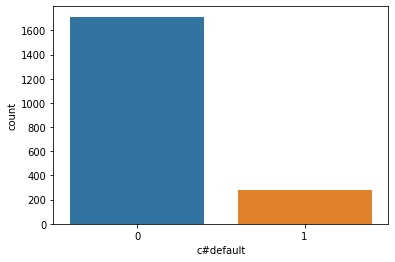

In [12]:
import seaborn as sns
sns.countplot(x=dataset['c#default']);

In [13]:
X = dataset.iloc[:, 1:4].values

In [14]:
X.shape

(1997, 3)

In [15]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [16]:
y = dataset.iloc[:, 4].values

In [17]:
y.shape

(1997,)

In [18]:
y

array([0, 0, 0, ..., 1, 0, 0])

## Base de treinamento e teste

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, stratify = y)

In [21]:
X_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

In [22]:
X_teste.shape, y_teste.shape

((400, 3), (400,))

In [23]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [24]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [25]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [26]:
226 / len(y_treinamento)

0.14151534126487164

In [27]:
np.unique(y_teste, return_counts=True)

(array([0, 1]), array([343,  57]))

In [28]:
57 / len(y_teste)

0.1425

## Classificação com Naïve Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [31]:
previsoes = modelo.predict(X_teste)

In [32]:
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [33]:
y_teste

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_teste,previsoes) #Corrigido 04/10/2021

0.92

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(y_teste,previsoes) #Corrigido 04/10/2021
cm

array([[334,   9],
       [ 23,  34]])

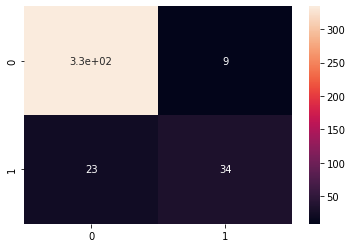

In [38]:
sns.heatmap(cm, annot=True);

In [39]:
(336 + 32) / (336 + 25 + 7 + 32)

0.92

In [40]:
# Percentual de acerto para pessoas que pagam o empréstimo
336 / (336 + 25)

0.9307479224376731

In [41]:
# Percentual de acerto para pessoas que não pagam o empréstimo
32 / (32 + 7)

0.8205128205128205

In [42]:
# Perdas: 5.000
# Clientes não pagadores: 1.000
1000 * 18 / 100

180.0

In [43]:
180 * 5000

900000

## Subamostragem (undersampling) - Tomek links

- https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html

In [44]:
from imblearn.under_sampling import TomekLinks

In [45]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y) #Atualizado 20/05/2022

In [46]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [47]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [48]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [49]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under,
                                                                          y_under,
                                                                          test_size=0.2,
                                                                          stratify=y_under)
X_treinamento_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [50]:
modelo_u = GaussianNB()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(y_teste_u,previsoes_u ) #Corrigido 04/10/2021

0.9210526315789473

In [51]:
cm_u = confusion_matrix(y_teste_u, previsoes_u) #Corrigido 04/10/2021
cm_u

array([[318,   5],
       [ 25,  32]])

In [52]:
315 / (315 + 26)

0.9237536656891495

In [53]:
31 / (31 + 8)

0.7948717948717948

## Sobreamostragem (oversampling) - SMOTE

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y) #Atualizado 20/05/2022

In [56]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [57]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [58]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [59]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over,
                                                                          test_size = 0.2,
                                                                          stratify=y_over)

In [60]:
X_treinamento_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [61]:
modelo_o = GaussianNB()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(y_teste_o, previsoes_o) #Corrigido 04/10/2021

0.9125364431486881

In [62]:
cm_o = confusion_matrix(y_teste_o, previsoes_o) #Corrigido 04/10/2021
cm_o

array([[295,  48],
       [ 12, 331]])

In [63]:
305 / (305 + 19)

0.941358024691358

In [64]:
324 / (324 + 38)

0.8950276243093923

In [65]:
# Perdas: 5.000
# Cliente não pagadores: 1.000
1000 * 11 / 100

110.0

In [66]:
110 * 5000

550000

In [67]:
900000 - 550000

350000